In [77]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [78]:
pip install tensorflow.keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow.keras


In [79]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [80]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()   

In [81]:
print(f'Dim de X_train = {X_train.shape}')
print(f'Dim de y_train = {y_train.shape}')
print(f'Dim de X_test = {X_test.shape}')
print(f'Dim de y_test = {y_test.shape}')

Dim de X_train = (60000, 28, 28)
Dim de y_train = (60000,)
Dim de X_test = (10000, 28, 28)
Dim de y_test = (10000,)


In [82]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [83]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [84]:
y_train[8]

np.uint8(1)

In [85]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


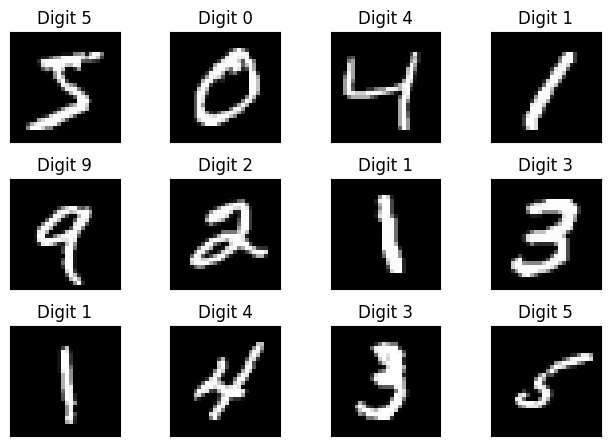

In [86]:
fig = plt.figure() 
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(f'Digit {y_train[i]}')
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'Distribution des valeurs des pixels')

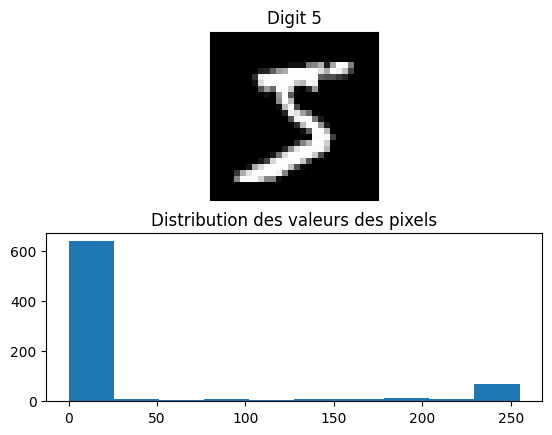

In [87]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap = 'gray')
plt.title(f'Digit {y_train[0]}')
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title('Distribution des valeurs des pixels')

In [88]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [89]:
X_train /= 255 
X_test /= 255

In [90]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
nb_classes = 10
print(f'Dim avant one-hot-encoder {y_train.shape}')

Dim avant one-hot-encoder (60000,)


In [92]:
Y_train = to_categorical(y_train,nb_classes)
print(f'Dim après one-hot-encoder {Y_train.shape}')

Dim après one-hot-encoder (60000, 10)


In [93]:
y_train[0]

np.uint8(5)

In [94]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [95]:
model = Sequential() 
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(10))
model.add(Activation('softmax'))

In [96]:
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam') 

In [98]:
Y_test = to_categorical(y_test,nb_classes)

In [99]:
history = model.fit(X_train,Y_train,
         batch_size = 128,
         epochs = 20,
         verbose = 1,
         validation_data = (X_test,Y_test)) 

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8588 - loss: 0.4569 - val_accuracy: 0.9665 - val_loss: 0.1108
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9688 - loss: 0.1026 - val_accuracy: 0.9741 - val_loss: 0.0813
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9770 - loss: 0.0717 - val_accuracy: 0.9741 - val_loss: 0.0804
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9821 - loss: 0.0556 - val_accuracy: 0.9799 - val_loss: 0.0637
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9806 - val_loss: 0.0626
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9804 - val_loss: 0.0643
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9898 - loss: 0.0310 - val_accuracy: 0.9804 - val_loss: 0.0647
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9899 - loss: 0.0298 - val_accuracy: 0

In [100]:
import os 
save_dir = './'

In [101]:
model_name = 'keras_MNIST.h5'
model_path = os.path.join(save_dir, model_name)

In [102]:
model.save(model_path)

In [103]:
print('Modèle enregistré dans %s' % model_path)

Modèle enregistré dans ./keras_MNIST.h5


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

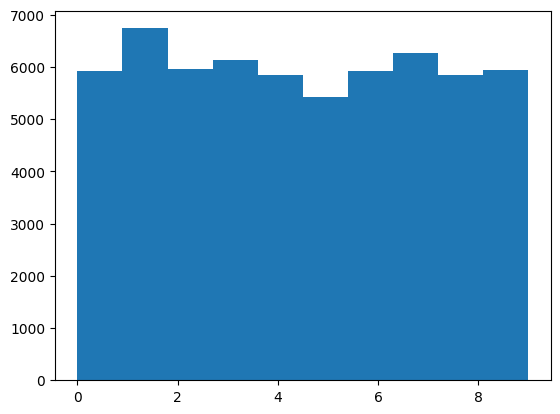

In [104]:
plt.hist(y_train)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

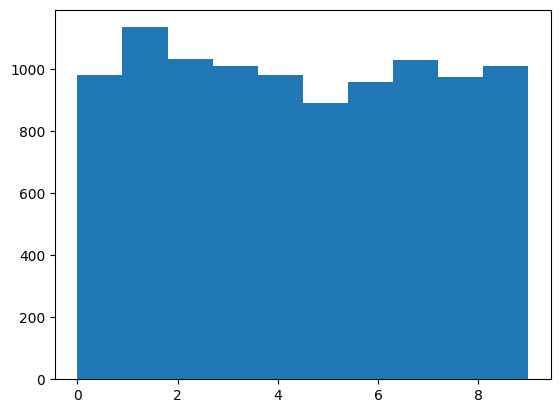

In [105]:
plt.hist(y_test)

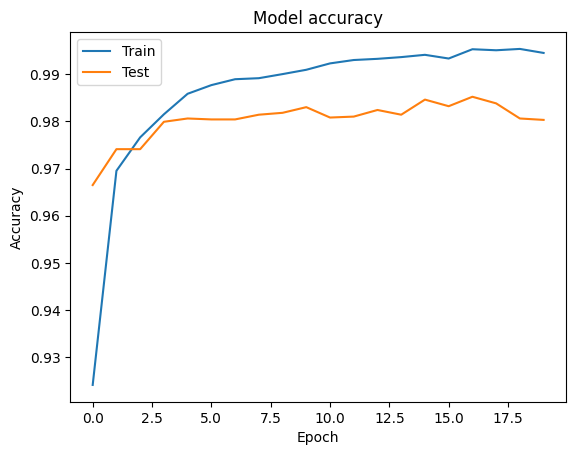

In [106]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

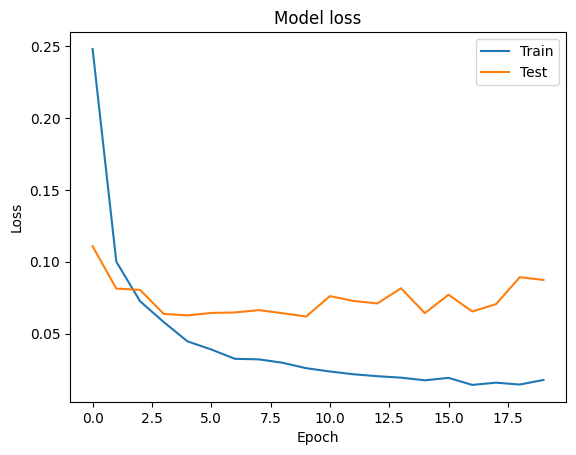

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])

In [108]:

mnist_model = load_model('keras_MNIST.h5')

In [109]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.9803 - loss: 0.0873


In [110]:
print(f'Loss test {round(loss_and_metrics[0],4)}')
print(f'Accuracy test {round(loss_and_metrics[1],4)}')

Loss test 0.0873
Accuracy test 0.9803


In [111]:
predict_X = mnist_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [112]:
predicted_classes = np.argmax(predict_X, axis=1)

In [113]:
for i in range(10):
    print([y_test[i],predicted_classes[i]])

[np.uint8(7), np.int64(7)]
[np.uint8(2), np.int64(2)]
[np.uint8(1), np.int64(1)]
[np.uint8(0), np.int64(0)]
[np.uint8(4), np.int64(4)]
[np.uint8(1), np.int64(1)]
[np.uint8(4), np.int64(4)]
[np.uint8(9), np.int64(9)]
[np.uint8(5), np.int64(6)]
[np.uint8(9), np.int64(9)]


In [114]:
np.nonzero(predicted_classes!=y_test)

(array([   8,  115,  149,  151,  247,  320,  321,  381,  445,  495,  582,
         619,  646,  659,  674,  717,  720,  726,  740,  846,  947,  951,
         956, 1014, 1032, 1039, 1101, 1112, 1156, 1217, 1226, 1232, 1242,
        1247, 1260, 1299, 1319, 1328, 1378, 1393, 1444, 1494, 1530, 1549,
        1553, 1621, 1641, 1678, 1681, 1790, 1901, 1911, 1987, 2029, 2053,
        2070, 2073, 2093, 2098, 2109, 2118, 2130, 2135, 2182, 2189, 2224,
        2291, 2293, 2369, 2387, 2395, 2405, 2406, 2408, 2422, 2462, 2488,
        2582, 2597, 2607, 2631, 2648, 2654, 2901, 2927, 2939, 2953, 3060,
        3073, 3117, 3225, 3289, 3369, 3388, 3405, 3451, 3457, 3475, 3490,
        3503, 3520, 3558, 3565, 3597, 3726, 3776, 3780, 3811, 3818, 3850,
        3893, 3902, 3906, 3941, 3976, 3985, 4000, 4027, 4065, 4078, 4140,
        4176, 4194, 4199, 4205, 4248, 4271, 4289, 4360, 4437, 4443, 4477,
        4504, 4551, 4639, 4740, 4751, 4761, 4807, 4823, 4879, 4880, 4956,
        5331, 5457, 5634, 5642, 5676, 

In [115]:
[y_test[115],predicted_classes[115]]

[np.uint8(4), np.int64(9)]

In [116]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

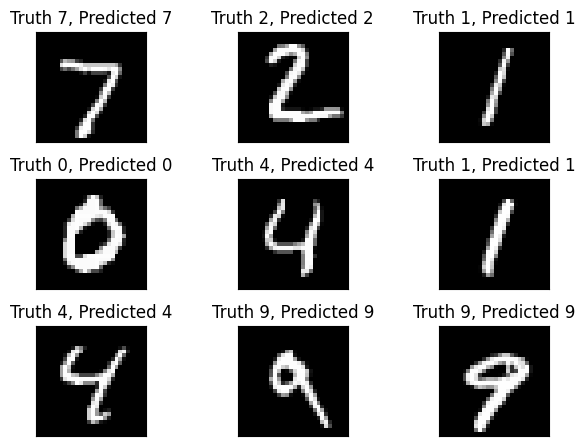

In [117]:
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[correct]}, Predicted {predicted_classes[correct]}')
    plt.xticks([])
    plt.yticks([])

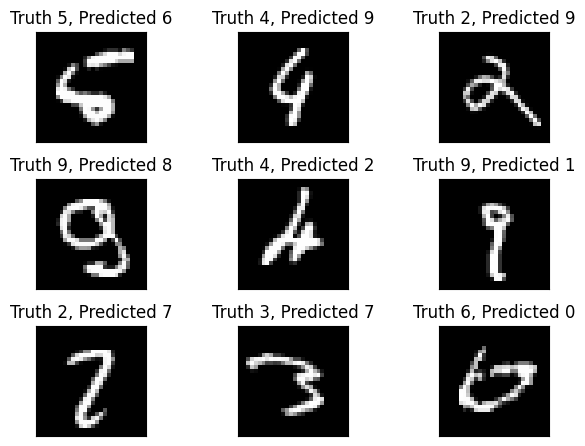

In [118]:
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[incorrect]}, Predicted {predicted_classes[incorrect]}')
    plt.xticks([])
    plt.yticks([])